# CSTR exercise

William Hartt & Eric Furst  
Chemical Engineering with Computers  
March 2025

This is an example of solving a system of nonlinear algebraic equations relevant to chemical engineering.  There are several topics helpful for your future assignment including:

1. Chemical reactions in Latex/Markdown
2. Arguements (*args) and keyword arguments (**kwargs) for functions passed to scipy
3. Pandas dataframes usage to improve your life
4. Using Seaborn to product plots with ease

In [1]:
import numpy as np
from scipy.optimize import root
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

$$\require{mhchem}$$ 

# Exercises (in class & hw):
1. Place image of CSTR and I/O in notebook
2. Create a table of Out = In + Generation - Consumption in the notebook
3. Create a table for the rate constants
4. Include units everywhere, including pandas dataframe (bonus)

## Problem statement - what is the effluent composition leaving a CSTR

Reactor volume $V_R$ = 100 liters

Volumetric feed rate $Q$ = 50 $\frac{liters}{sec}$

Concentrations in $\left< \frac{g-mole}{Liter} \right>$

### Reaction scheme
$$\ce{ A ->[r_1] 2B }$$

$$\ce{ A <=>[r_2][r_3] C}$$

$$\ce{ B ->[r_4] C + D}$$

### Rate equations
$$r_1 = k_1 C_A$$

$$r_2 = k_2 C_A^{\frac{1}{2}}$$

$$r_3 = k_3 C_C^2$$

$$r_4 = k_4 C_B^2$$

### Rate constants
$k_1$ = 1.0 $sec^{-1}$

$k_2$ = 0.2 $\frac{liter^{1/2}}{gmole^{1/2}-sec}$

$k_3$ = 0.05 $\frac{liter}{gmole-sec}$

$k_4$ = 0.4 $\frac{liter}{gmole-sec}$

## Task 1 - create tables to make this information look nice

Note I used mchem for the Latex chemical reactions.  Use \ce{ formula here }.  You can use markdown tables, Latex tables, or something fancier.  Feel free to use ChatGPT or similar.  Also include an image of a CSTR in your notebook.

## Step 1 - solve the system for $q=50 \frac{L^3}{sec}$

You have a couple of options for feeding your rate constants, CSTR essentials, and feed rate concentration to your function f(x).  A few options are
1. Hard coded into the function - a good place to start but a hassle to change values later
2. Arguments (*args) accepted by scipy.optimize.root
3. Keyword arguments - **kwargs
4. Lambda functions (as shown previously in class)
5. There is one other options which is NOT recommended


In [2]:
# Hard coded into the function (include units!)

def f(x):
    k1 = 1.
    k2 = 0.2
    k3 = 0.05
    k4 = 0.4

    vr = 100.
    q = 50.
    ca0 = 1.0

    # Class - include comments with x[i] definitions


    return [
        -x[0]+ ca0 +vr*(-k1*x[0]-k2*x[0]**1.5+k3*x[2]**2)/q,
        -x[1]+vr*(2*k1*x[0]-k4*x[1]**2)/q,
        -x[2]+vr*(k2*x[0]**1.5-k3*x[2]**2+k4*x[1]**2)/q,
        -x[3]+vr*(k4*x[1]**2)/q
    ]

In [3]:
# Solve the system

x = [0.,0.,0.,0.]
sol = root(f,x)
sol

 message: The solution converged.
 success: True
  status: 1
     fun: [-8.882e-16 -3.331e-16  1.221e-15  3.886e-16]
       x: [ 3.189e-01  7.839e-01  5.350e-01  4.916e-01]
  method: hybr
    nfev: 17
    fjac: [[-6.977e-01  5.537e-01  3.538e-01  2.856e-01]
           [ 1.819e-01  7.503e-01 -4.708e-01 -4.270e-01]
           [-4.747e-01 -2.294e-01 -8.025e-01  2.793e-01]
           [ 5.048e-01  2.790e-01 -9.600e-02  8.112e-01]]
       r: [ 4.766e+00 -4.325e-01 -4.027e-01 -3.094e-01 -1.970e+00
            9.085e-01  8.676e-01  8.859e-01 -2.006e-01 -9.271e-01]
     qtf: [ 1.251e-11 -1.839e-11 -5.677e-12 -3.916e-12]

In [4]:
? root

Signature:
 root(
    fun,
    x0,
    args=(),
    method='hybr',
    jac=None,
    tol=None,
    callback=None,
    options=None,
)
Docstring:
Find a root of a vector function.

Parameters
----------
fun : callable
    A vector function to find a root of.

    Suppose the callable has signature ``f0(x, *my_args, **my_kwargs)``, where
    ``my_args`` and ``my_kwargs`` are required positional and keyword arguments.
    Rather than passing ``f0`` as the callable, wrap it to accept
    only ``x``; e.g., pass ``fun=lambda x: f0(x, *my_args, **my_kwargs)`` as the
    callable, where ``my_args`` (tuple) and ``my_kwargs`` (dict) have been
    gathered before invoking this function.
x0 : ndarray
    Initial guess.
args : tuple, optional
    Extra arguments passed to the objective function and its Jacobian.
method : str, optional
    Type of solver. Should be one of

    - 'hybr'             :ref:`(see here) <optimize.root-hybr>`
    - 'lm'               :ref:`(see here) <optimize.root-lm>`
  

## *args

Useful, but not as obvious the user what's happening - the arguments in f_a are not labelled.  You need to know the correct type and order.  Note this is the only other direct option for using scipy.optimize.root.

In [5]:
# *args

def f_a(x,*args):

    k,vr,q,ca0 = args # Note k must be a list of 4 floating point numbers

    return [
        -x[0]+ ca0 +vr*(-k[0]*x[0]-k[1]*x[0]**1.5+k[2]*x[2]**2)/q,
        -x[1]+vr*(2*k[0]*x[0]-k[3]*x[1]**2)/q,
        -x[2]+vr*(k[1]*x[0]**1.5-k[2]*x[2]**2+k[3]*x[1]**2)/q,
        -x[3]+vr*(k[3]*x[1]**2)/q
    ]

In [6]:
x0 = [0.,0.,0.,0.]

k = [1.,.2,.05,.4]
vr = 100.
q = 50.
ca0 = 1.0

sol = root(f_a, x0, args=(k,vr,q,ca0))
sol

 message: The solution converged.
 success: True
  status: 1
     fun: [-8.882e-16 -3.331e-16  1.221e-15  3.886e-16]
       x: [ 3.189e-01  7.839e-01  5.350e-01  4.916e-01]
  method: hybr
    nfev: 17
    fjac: [[-6.977e-01  5.537e-01  3.538e-01  2.856e-01]
           [ 1.819e-01  7.503e-01 -4.708e-01 -4.270e-01]
           [-4.747e-01 -2.294e-01 -8.025e-01  2.793e-01]
           [ 5.048e-01  2.790e-01 -9.600e-02  8.112e-01]]
       r: [ 4.766e+00 -4.325e-01 -4.027e-01 -3.094e-01 -1.970e+00
            9.085e-01  8.676e-01  8.859e-01 -2.006e-01 -9.271e-01]
     qtf: [ 1.251e-11 -1.839e-11 -5.677e-12 -3.916e-12]

## **kwargs

Very useful:
1. Default values exist
2. It's obvious to the user what each argument is
3. Downside - need to use lambda functions now (this was not alwats the case)

In [7]:
# **kwargs

def f_kw(x,**kwargs):

    # Default values used if no args passed
    k = kwargs.get('k',[1.,.2,.05,.4])
    vr = kwargs.get('vr', 100.)
    q = kwargs.get('q', 50.)
    ca0 = kwargs.get('ca0', 1.0)

    return [
        -x[0]+ ca0 +vr*(-k[0]*x[0]-k[1]*x[0]**1.5+k[2]*x[2]**2)/q,
        -x[1]+vr*(2*k[0]*x[0]-k[3]*x[1]**2)/q,
        -x[2]+vr*(k[1]*x[0]**1.5-k[2]*x[2]**2+k[3]*x[1]**2)/q,
        -x[3]+vr*(k[3]*x[1]**2)/q
    ]

In [8]:
x0 = [0.,0.,0.,0.]

sol = root(f_kw, x0)
sol

 message: The solution converged.
 success: True
  status: 1
     fun: [-8.882e-16 -3.331e-16  1.221e-15  3.886e-16]
       x: [ 3.189e-01  7.839e-01  5.350e-01  4.916e-01]
  method: hybr
    nfev: 17
    fjac: [[-6.977e-01  5.537e-01  3.538e-01  2.856e-01]
           [ 1.819e-01  7.503e-01 -4.708e-01 -4.270e-01]
           [-4.747e-01 -2.294e-01 -8.025e-01  2.793e-01]
           [ 5.048e-01  2.790e-01 -9.600e-02  8.112e-01]]
       r: [ 4.766e+00 -4.325e-01 -4.027e-01 -3.094e-01 -1.970e+00
            9.085e-01  8.676e-01  8.859e-01 -2.006e-01 -9.271e-01]
     qtf: [ 1.251e-11 -1.839e-11 -5.677e-12 -3.916e-12]

### Let's change the rate constants

In [9]:
# Change rate constants

x0 = [0.,0.,0.,0.]
new_k = [1.,.1,.1,.4]
f = lambda x: f_kw(x,k=new_k)

sol = root(f, x0)
sol

 message: The solution converged.
 success: True
  status: 1
     fun: [-1.998e-15  9.992e-16  8.882e-16 -8.882e-16]
       x: [ 3.383e-01  8.179e-01  5.204e-01  5.352e-01]
  method: hybr
    nfev: 17
    fjac: [[-6.920e-01  5.583e-01  3.477e-01  2.976e-01]
           [ 1.832e-01  7.491e-01 -4.787e-01 -4.197e-01]
           [-4.610e-01 -2.318e-01 -8.023e-01  3.001e-01]
           [ 5.244e-01  2.711e-01 -7.925e-02  8.032e-01]]
       r: [ 4.673e+00 -3.909e-01 -4.635e-01 -3.775e-01 -2.020e+00
            1.016e+00  9.017e-01  9.106e-01 -2.084e-01 -8.932e-01]
     qtf: [-2.927e-11 -3.038e-12  6.314e-12  2.385e-11]

In [10]:
# Change reactor volume

x0 = [0.,0.,0.,0.]
f = lambda x: f_kw(x,vr=200.)

sol = root(f, x0)
sol

 message: The solution converged.
 success: True
  status: 1
     fun: [-7.483e-14 -2.564e-12  2.639e-12  2.564e-12]
       x: [ 2.147e-01  7.696e-01  8.744e-01  9.477e-01]
  method: hybr
    nfev: 25
    fjac: [[ 5.302e-01 -2.059e-01 -6.089e-01 -5.530e-01]
           [ 1.830e-01 -9.194e-01  2.562e-01  2.356e-01]
           [ 4.144e-01  1.658e-01  7.492e-01 -4.894e-01]
           [-7.168e-01 -2.912e-01  4.815e-02 -6.318e-01]]
       r: [-1.054e+01 -1.198e+00  1.278e+00  1.204e+00  2.792e+00
           -1.017e+00 -1.061e+00 -8.463e-01  4.066e-01  7.372e-01]
     qtf: [ 1.057e-09 -1.507e-09 -1.115e-10  2.864e-10]

## Step 2 - examine the effect of flow rate

Try from 10-60 $L^3/sec$

Do you run into any issues?  Resort to 20-60 $L^3/sec$ if needed.


### Bonus = Vectorize this

In [11]:
# Change rate constants

q = 20.0

f = lambda x: f_kw(x,q=q)

sol = root(f, x0)
sol

 message: The solution converged.
 success: True
  status: 1
     fun: [ 6.110e-12 -1.164e-12 -4.946e-12  1.164e-12]
       x: [ 1.949e-01  7.684e-01  1.011e+00  1.181e+00]
  method: hybr
    nfev: 28
    fjac: [[-3.973e-01 -2.767e-02  6.661e-01  6.306e-01]
           [-2.924e-01  9.512e-01 -7.899e-02 -5.903e-02]
           [ 3.568e-01  1.370e-01  7.411e-01 -5.520e-01]
           [-7.933e-01 -2.751e-01  2.883e-02 -5.424e-01]]
       r: [ 1.659e+01  2.324e+00 -1.766e+00 -1.760e+00 -2.691e+00
            8.020e-01  8.797e-01 -8.415e-01  4.737e-01  6.452e-01]
     qtf: [-4.319e-10 -2.263e-10 -2.000e-10 -4.639e-10]

## Create a list/array of results for different flow rates

In [12]:
# Iterate over a list of flow rates

x0 = [0.,0.,0.,0.]
q_list = np.linspace(15.,50.,11)

sol_list = [ root(lambda x: f_kw(x,q=q_new),x0).x for q_new in q_list ]
sol_list

[array([0.18523342, 0.79297099, 1.25668508, 1.676808  ]),
 array([0.19014531, 0.77084935, 1.06681782, 1.28477562]),
 array([0.20236605, 0.76781123, 0.94966841, 1.07188016]),
 array([0.21679294, 0.7700871 , 0.86328833, 0.93024964]),
 array([0.23192967, 0.77374583, 0.79408198, 0.82576912]),
 array([0.24717589, 0.77735403, 0.73601127, 0.74372835]),
 array([0.26225099, 0.78034749, 0.68587649, 0.67660245]),
 array([0.2770135 , 0.78251666, 0.64176985, 0.62008336]),
 array([0.2913906 , 0.78380967, 0.60245229, 0.57149544]),
 array([0.30534634, 0.78424744, 0.56706501, 0.52907015]),
 array([0.31886581, 0.78388398, 0.53498184, 0.49157927])]

## Write a function that returns the solution over a list of flow rates

Name the function 'conc'  
Arguments should be q, f_kw, x0

In [20]:
def conc(q,f_kw,x0):
    sol = root(lambda x: f_kw(x,q=q),x0).x
    return sol


In [21]:
# create a list of flow rates
qList = np.linspace(15,50,11)

In [22]:
# Test your function here

x0 = [0.,0.,0.,0.]

for q in qList:
    cs = conc(q,f_kw,x0)
    print(q,cs)

15.0 [0.18523342 0.79297099 1.25668508 1.676808  ]
18.5 [0.19014531 0.77084935 1.06681782 1.28477562]
22.0 [0.20236605 0.76781123 0.94966841 1.07188016]
25.5 [0.21679294 0.7700871  0.86328833 0.93024964]
29.0 [0.23192967 0.77374583 0.79408198 0.82576912]
32.5 [0.24717589 0.77735403 0.73601127 0.74372835]
36.0 [0.26225099 0.78034749 0.68587649 0.67660245]
39.5 [0.2770135  0.78251666 0.64176985 0.62008336]
43.0 [0.2913906  0.78380967 0.60245229 0.57149544]
46.5 [0.30534634 0.78424744 0.56706501 0.52907015]
50.0 [0.31886581 0.78388398 0.53498184 0.49157927]


In [23]:
q_list = np.linspace(10.,60.,16)
x0 = [0.,0.,0.,0.]

x_list = []

for q in q_list:
    cs = conc(q,f_kw,x0)
    x_list.append(cs)
    if np.isnan(cs[0]):
        x0 = [0.,0.,0.,0.]
    else:
        x0 = cs
x_list

C:\Users\mtnor\AppData\Local\Temp\ipykernel_41680\361613151.py:12: RuntimeWarning: invalid value encountered in scalar power
  -x[0]+ ca0 +vr*(-k[0]*x[0]-k[1]*x[0]**1.5+k[2]*x[2]**2)/q,
C:\Users\mtnor\AppData\Local\Temp\ipykernel_41680\361613151.py:14: RuntimeWarning: invalid value encountered in scalar power
  -x[2]+vr*(k[1]*x[0]**1.5-k[2]*x[2]**2+k[3]*x[1]**2)/q,


[array([0., 0., 0., 0.]),
 array([0.1917717 , 0.826629  , 1.41988705, 2.04994651]),
 array([0.18594692, 0.77814393, 1.15159069, 1.45321915]),
 array([0.1949378 , 0.76842477, 1.01132644, 1.18095326]),
 array([0.20771528, 0.76835496, 0.91413811, 1.01206174]),
 array([0.22179927, 0.77125141, 0.83869658, 0.8922431 ]),
 array([0.23629059, 0.77481648, 0.77652822, 0.80045409]),
 array([0.25078759, 0.77813417, 0.723441  , 0.72659134]),
 array([0.26508992, 0.78082728, 0.6770553 , 0.66511772]),
 array([0.27909211, 0.78275507, 0.6358831 , 0.61270549]),
 array([0.29273823, 0.78388752, 0.598924  , 0.56721199]),
 array([0.30600007, 0.7842478 , 0.56546657, 0.52718109]),
 array([0.31886581, 0.78388398, 0.53498184, 0.49157927]),
 array([0.33133355, 0.78285469, 0.50706216, 0.4596461 ]),
 array([0.34340755, 0.78122159, 0.48138419, 0.43080506]),
 array([0.35509594, 0.77904536, 0.45768527, 0.40460778])]

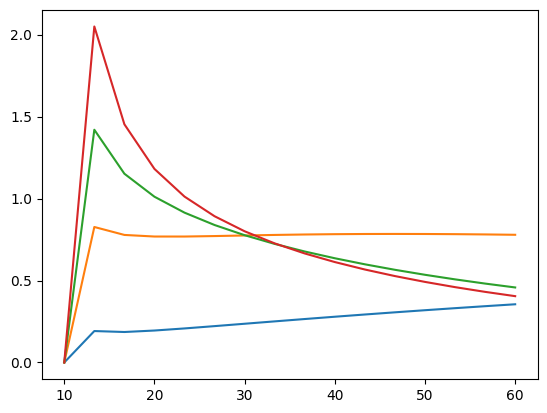

In [24]:
plt.plot(q_list,x_list)

## Try $q = 10 \frac{Liters^3}{sec}$

What happens?

What happens when we start our q_list from 10?

In [25]:
x0 = [0.,0.,0.,0.]
q = 12.0

new_f = lambda x: f_kw(x,q=q)
sol = root(new_f,x0)
sol

 message: The solution converged.
 success: True
  status: 1
     fun: [ 8.216e-15  7.216e-15 -1.532e-14 -7.105e-15]
       x: [ 2.155e-01  8.989e-01  1.682e+00  2.693e+00]
  method: hybr
    nfev: 36
    fjac: [[ 1.483e-01  3.253e-01 -6.327e-01 -6.869e-01]
           [ 3.020e-01 -9.120e-01 -1.348e-01 -2.426e-01]
           [-1.155e-01 -9.378e-02 -7.609e-01  6.315e-01]
           [ 9.346e-01  2.315e-01  4.990e-02  2.654e-01]]
       r: [-4.609e+01 -4.786e+00  2.470e+00  2.884e+00  2.365e+00
           -3.551e-01 -3.794e-01  8.983e-01 -5.001e-01 -2.540e-01]
     qtf: [-5.088e-10  5.572e-12 -1.565e-10 -1.880e-10]

### We will return to low flow rates later

In [26]:
# Create a list of results for different flow rates

q_list = np.linspace(20,60,11)
x0 = [0.,0.,0.,0.]

x_list = []

for q in q_list:
    cs = conc(q,f_kw,x0)
    x_list.append(cs)
    x0 = cs

x_list

[array([0.1949378 , 0.76842477, 1.01132644, 1.18095326]),
 array([0.21046789, 0.76880282, 0.89767884, 0.98509629]),
 array([0.22757592, 0.7726663 , 0.81252893, 0.85287601]),
 array([0.24500377, 0.77686824, 0.74376477, 0.75440533]),
 array([0.26225099, 0.78034749, 0.68587649, 0.67660245]),
 array([0.27909211, 0.78275507, 0.6358831 , 0.61270549]),
 array([0.2954219 , 0.78402005, 0.59197146, 0.55880677]),
 array([0.31119418, 0.78418601, 0.55294102, 0.51245642]),
 array([0.32639405, 0.78334233, 0.51794448, 0.47201939]),
 array([0.3410239 , 0.78159357, 0.48635378, 0.43634893]),
 array([0.35509594, 0.77904536, 0.45768527, 0.40460778])]

### Make it work even if we have unconverged solutions

In [27]:
def conc(q,f_kw,x0):
    new_f = lambda x: f_kw(x,q=q)
    sol = root(new_f,x0)

    if sol['success']==True:
        return sol['x']
    else:
        return [np.nan,np.nan,np.nan,np.nan]

q_list = np.linspace(10.,60.,11)
x0 = [0.,0.,0.,0.]

x_list = []

for q in q_list:
    cs = conc(q,f_kw,x0)
    x_list.append(cs)

x_list

C:\Users\mtnor\AppData\Local\Temp\ipykernel_41680\361613151.py:12: RuntimeWarning: invalid value encountered in scalar power
  -x[0]+ ca0 +vr*(-k[0]*x[0]-k[1]*x[0]**1.5+k[2]*x[2]**2)/q,
C:\Users\mtnor\AppData\Local\Temp\ipykernel_41680\361613151.py:14: RuntimeWarning: invalid value encountered in scalar power
  -x[2]+vr*(k[1]*x[0]**1.5-k[2]*x[2]**2+k[3]*x[1]**2)/q,


[[nan, nan, nan, nan],
 array([0.18523342, 0.79297099, 1.25668508, 1.676808  ]),
 array([0.1949378 , 0.76842477, 1.01132644, 1.18095326]),
 array([0.21466781, 0.76962536, 0.87437807, 0.94771711]),
 array([0.23629059, 0.77481648, 0.77652822, 0.80045409]),
 array([0.2579712 , 0.77957118, 0.69951819, 0.69454998]),
 array([0.27909211, 0.78275507, 0.6358831 , 0.61270549]),
 array([0.29941822, 0.78416155, 0.58179405, 0.54658608]),
 array([0.31886581, 0.78388398, 0.53498184, 0.49157927]),
 array([0.33741933, 0.78210977, 0.49396059, 0.4448696 ]),
 array([0.35509594, 0.77904536, 0.45768527, 0.40460778])]

## Let's organize the result
1. Create a Pandas dataframe
2. Create the long form dataframe
3. Let Seaborn plot results

In [28]:
df = pd.DataFrame(x_list)

In [29]:
df

,0,1,2,3
0,NaN,NaN,NaN,NaN
1,0.185233,0.792971,1.256685,1.676808
2,0.194938,0.768425,1.011326,1.180953
3,0.214668,0.769625,0.874378,0.947717
4,0.236291,0.774816,0.776528,0.800454
5,0.257971,0.779571,0.699518,0.694550
6,0.279092,0.782755,0.635883,0.612705
7,0.299418,0.784162,0.581794,0.546586
8,0.318866,0.783884,0.534982,0.491579
9,0.337419,0.782110,0.493961,0.444870


In [30]:
df['q'] = q_list

In [31]:
df

,0,1,2,3,q
0,NaN,NaN,NaN,NaN,10.0
1,0.185233,0.792971,1.256685,1.676808,15.0
2,0.194938,0.768425,1.011326,1.180953,20.0
3,0.214668,0.769625,0.874378,0.947717,25.0
4,0.236291,0.774816,0.776528,0.800454,30.0
5,0.257971,0.779571,0.699518,0.694550,35.0
6,0.279092,0.782755,0.635883,0.612705,40.0
7,0.299418,0.784162,0.581794,0.546586,45.0
8,0.318866,0.783884,0.534982,0.491579,50.0
9,0.337419,0.782110,0.493961,0.444870,55.0


In [32]:
df.rename(columns={0: 'A', 1: 'B', 2: 'C', 3: 'D', 'q': 'Q (L^3/s)'}, inplace=True)

In [33]:
df

,A,B,C,D,Q (L^3/s)
0,NaN,NaN,NaN,NaN,10.0
1,0.185233,0.792971,1.256685,1.676808,15.0
2,0.194938,0.768425,1.011326,1.180953,20.0
3,0.214668,0.769625,0.874378,0.947717,25.0
4,0.236291,0.774816,0.776528,0.800454,30.0
5,0.257971,0.779571,0.699518,0.694550,35.0
6,0.279092,0.782755,0.635883,0.612705,40.0
7,0.299418,0.784162,0.581794,0.546586,45.0
8,0.318866,0.783884,0.534982,0.491579,50.0
9,0.337419,0.782110,0.493961,0.444870,55.0


In [34]:
df_melted = df.melt(id_vars=['Q (L^3/s)'], var_name='Species', value_name = 'Concentration (g-mol/L)')

In [35]:
df_melted

,Q (L^3/s),Species,Concentration (g-mol/L)
0,10.0,A,NaN
1,15.0,A,0.185233
2,20.0,A,0.194938
3,25.0,A,0.214668
4,30.0,A,0.236291
5,35.0,A,0.257971
6,40.0,A,0.279092
7,45.0,A,0.299418
8,50.0,A,0.318866
9,55.0,A,0.337419


## We can easily create a labeled plot with all of our results!

<Axes: xlabel='Q (L^3/s)', ylabel='Concentration (g-mol/L)'>

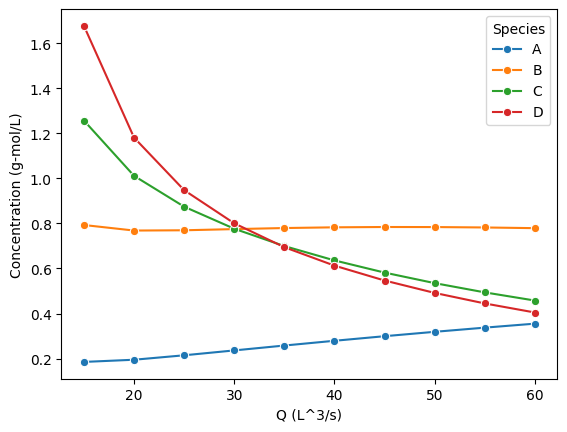

In [36]:
sns.lineplot(x='Q (L^3/s)', y='Concentration (g-mol/L)', hue='Species', data=df_melted, marker='o')

### Try it for different numbers of flow rates and different flow rate ranges

Bonus - look at rate constants

Explore Seaborn options to customize your plot

C:\Users\mtnor\AppData\Local\Temp\ipykernel_41680\361613151.py:12: RuntimeWarning: invalid value encountered in scalar power
  -x[0]+ ca0 +vr*(-k[0]*x[0]-k[1]*x[0]**1.5+k[2]*x[2]**2)/q,
C:\Users\mtnor\AppData\Local\Temp\ipykernel_41680\361613151.py:14: RuntimeWarning: invalid value encountered in scalar power
  -x[2]+vr*(k[1]*x[0]**1.5-k[2]*x[2]**2+k[3]*x[1]**2)/q,


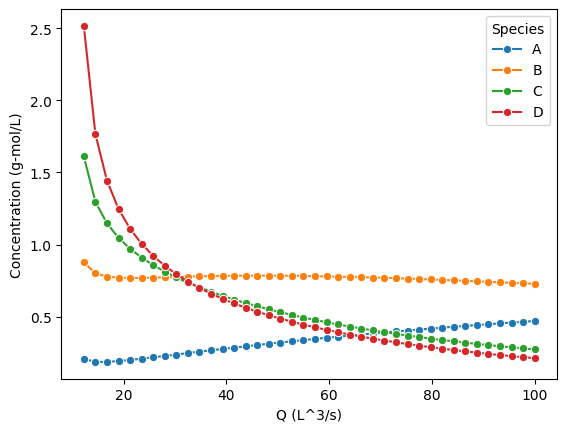

In [37]:
q_list = np.linspace(10.,100.,41)
x0 = [0.,0.,0.,0.]
x_list = []

for q in q_list:
    cs = conc(q,f_kw,x0)
    x_list.append(cs)

df = pd.DataFrame(x_list)
df['q'] = q_list
df.rename(columns={0: 'A', 1: 'B', 2: 'C', 3: 'D', 'q': 'Q (L^3/s)'}, inplace=True)
df_melted = df.melt(id_vars=['Q (L^3/s)'], var_name='Species', value_name = 'Concentration (g-mol/L)')
sns.lineplot(x='Q (L^3/s)', y='Concentration (g-mol/L)', hue='Species', data=df_melted, marker='o');

## Let's work harder for a solution when q~10 L^3/s

There are two potential issues:
1. We need a better inital guess for x0
2. Our numerical Jacobian is not accurate enough

In [38]:
x0 = [.3,.3,.3,.3]
q = 11.3

new_f = lambda x: f_kw(x,q=q)
sol = root(new_f,x0)
sol

 message: The iteration is not making good progress, as measured by the 
           improvement from the last five Jacobian evaluations.
 success: False
  status: 4
     fun: [ 3.617e-03  2.112e-03  2.390e-03  5.239e-07]
       x: [ 2.907e-01  1.072e+00  2.202e+00  4.071e+00]
  method: hybr
    nfev: 64
    fjac: [[-5.362e-01  8.413e-01  6.805e-02  0.000e+00]
           [-2.999e-01 -2.454e-01  6.706e-01  6.326e-01]
           [ 2.449e-01  2.004e-01 -5.477e-01  7.745e-01]
           [-7.500e-01 -4.380e-01 -4.957e-01  2.807e-05]]
       r: [ 2.104e+01 -6.713e+00 -1.246e+00  0.000e+00  1.200e+01
           -2.562e+00 -6.326e-01  2.092e+00 -7.745e-01 -2.807e-05]
     qtf: [ 9.832e-07 -5.266e-07  9.715e-07 -4.822e-03]

### This is a crude form of continuation

We use an initial guess from a nearby solution (close q)

In [39]:
x0 = [.3,.3,.3,.3]

cs = conc(11.4,f_kw,x0)
cs

array([0.26527435, 1.01796456, 2.04372906, 3.63597138])

In [40]:
# Use the solution for q=11.4 as out initial guess for q=11.39
x0 = cs

cs = conc(11.39,f_kw,x0)
cs

array([0.26813817, 1.02422753, 2.06178852, 3.6840809 ])

In [41]:
# Use the solution for q=11.4 as out initial guess for q=11.38
x0 = cs

cs = conc(11.38,f_kw,x0)
cs

array([0.27151353, 1.03154842, 2.08282148, 3.74021845])

In [42]:
q_list = np.linspace(11.4,11.35,21)
x0 = [.3,.3,.3,.3]

x_lowq_list = []

for q in q_list:
    cs = conc(q,f_kw,x0)
    x_lowq_list.append(cs)
    print(q, cs)
    x0 = cs

11.4 [0.26527435 1.01796456 2.04372906 3.63597138]
11.3975 [0.26595253 1.01945206 2.04802402 3.64740516]
11.395 [0.26665439 1.02098865 2.05245693 3.65921129]
11.3925 [0.2673821  1.02257875 2.05704027 3.67142351]
11.39 [0.26813817 1.02422753 2.06178852 3.6840809 ]
11.3875 [0.26892551 1.02594101 2.06671862 3.69722925]
11.385 [0.2697476  1.02772632 2.07185061 3.71092273]
11.3825 [0.27060859 1.029592   2.07720851 3.7252262 ]
11.38 [0.27151353 1.03154842 2.08282148 3.74021845]
11.3775 [0.27246867 1.0336084  2.08872552 3.75599678]
11.375 [0.27348183 1.03578807 2.09496599 3.77268371]
11.3725 [0.27456316 1.03810822 2.10160132 3.79043719]
11.37 [0.2757261  1.04059644 2.10870911 3.80946685]
11.3675 [0.27698915 1.04329074 2.11639616 3.83006135]
11.365 [0.27837906 1.04624598 2.12481673 3.85263756]
11.3625 [0.27993705 1.04954676 2.13420863 3.87783813]
11.36 [0.28173301 1.05333638 2.14497473 3.90675187]
11.3575 [0.2839047  1.05789733 2.15790914 3.941525  ]
11.355 [0.28681638 1.06397633 2.17511113 3.

## Add this result to our plot

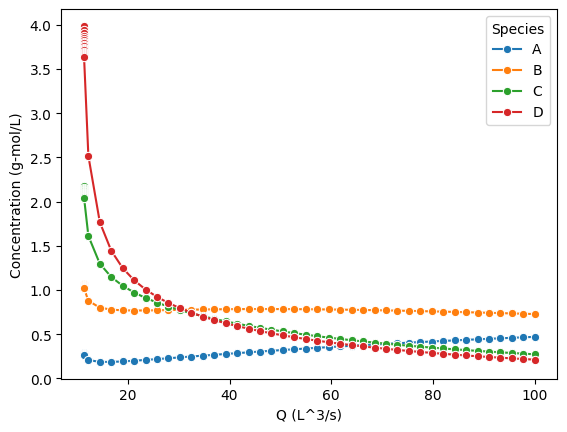

In [43]:
df_lowq = pd.DataFrame(x_lowq_list)
df_lowq['q'] = q_list
df_lowq.rename(columns={0: 'A', 1: 'B', 2: 'C', 3: 'D', 'q': 'Q (L^3/s)'}, inplace=True)
df_mixed = pd.concat([df,df_lowq],ignore_index=True)
df_mixed.sort_values(by='Q (L^3/s)',inplace=True)
df_mixed_melted = df_mixed.melt(id_vars=['Q (L^3/s)'], var_name='Species', value_name = 'Concentration (g-mol/L)')
sns.lineplot(x='Q (L^3/s)', y='Concentration (g-mol/L)', hue='Species', data=df_mixed_melted, marker='o');

### This is a form of continuation methods